In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_EC = pd.read_csv("Electricity Consumption.csv")

In [3]:
data_EC.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [4]:
data_EC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
data_EC.isnull().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [6]:
# Change the DATE column to datetime
data_EC['DATE']=pd.to_datetime(data_EC['DATE'])

In [7]:
data_EC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [8]:
data_EC.set_index('DATE',inplace=True)
data_EC.head()

,Electricty_Consumption_in_TW
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


In [9]:
# Make copy of data for further processing
data_sample = data_EC.copy()

In [10]:
# To use seasonal decomposition by the statsmodels library
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
result = seasonal_decompose(data_EC, model='additive')
result

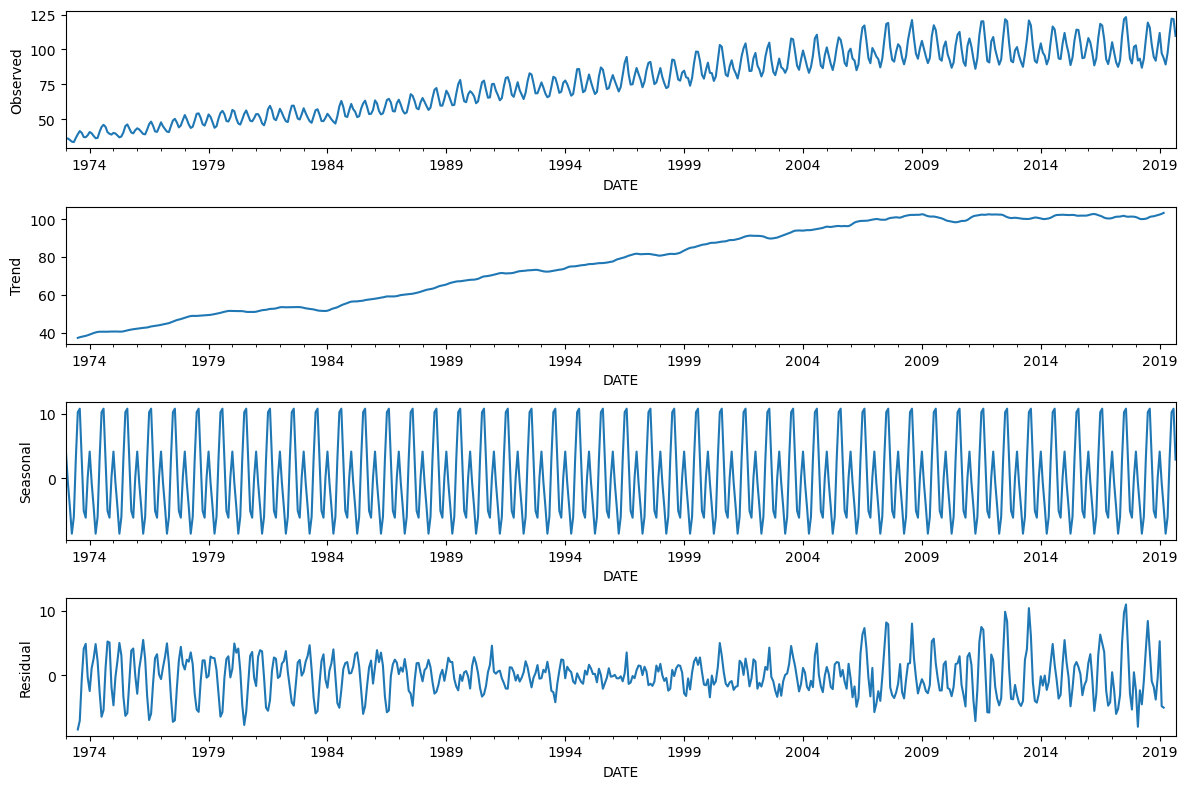

In [12]:
fig, (f1, f2, f3, f4) = plt.subplots(4, 1, figsize=(12, 8))

result.observed.plot(ax=f1)
f1.set_ylabel('Observed')

result.trend.plot(ax=f2)
f2.set_ylabel('Trend')

result.seasonal.plot(ax=f3)
f3.set_ylabel('Seasonal')

result.resid.plot(ax=f4)
f4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [13]:
# Check the Stationarity
from statsmodels.tsa.stattools import adfuller

In [14]:
#Ho: It is non-stationary
#H1: It is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adfuller_test(data_EC['Electricty_Consumption_in_TW'])

ADF Test Statistic : -1.7405933729832443
p-value : 0.41032816044686793
#Lags Used : 15
Number of Observations Used : 545
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Time series differencing

In [16]:
## Calculate 1 month shift
# Use shift()
data_EC['Electricty_Consumption_in_TW_First_Difference'] = data_EC['Electricty_Consumption_in_TW'] - data_EC['Electricty_Consumption_in_TW'].shift(1)
data_EC.head()

,Electricty_Consumption_in_TW,Electricty_Consumption_in_TW_First_Difference
DATE,,
1973-01-01,35.9728,NaN
1973-02-01,36.1334,0.1606
1973-03-01,35.0625,-1.0709
1973-04-01,33.8416,-1.2209
1973-05-01,33.5107,-0.3309


In [17]:
## Calculate 12 months shift
# Use shift()
data_EC['Seasonal First Difference']= data_EC['Electricty_Consumption_in_TW']-data_EC['Electricty_Consumption_in_TW'].shift(12)
data_EC.head()

,Electricty_Consumption_in_TW,Electricty_Consumption_in_TW_First_Difference,Seasonal First Difference
DATE,,,
1973-01-01,35.9728,NaN,NaN
1973-02-01,36.1334,0.1606,NaN
1973-03-01,35.0625,-1.0709,NaN
1973-04-01,33.8416,-1.2209,NaN
1973-05-01,33.5107,-0.3309,NaN


In [18]:
adfuller_test(data_EC['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.283726159436481
p-value : 3.7419901755219524e-08
#Lags Used : 12
Number of Observations Used : 536
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [19]:
adfuller_test(data_EC['Electricty_Consumption_in_TW_First_Difference'].dropna())

ADF Test Statistic : -7.941665363981184
p-value : 3.3013438021514486e-12
#Lags Used : 14
Number of Observations Used : 545
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [20]:
# To calculate autocorrelation and Partial Auto-correlation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

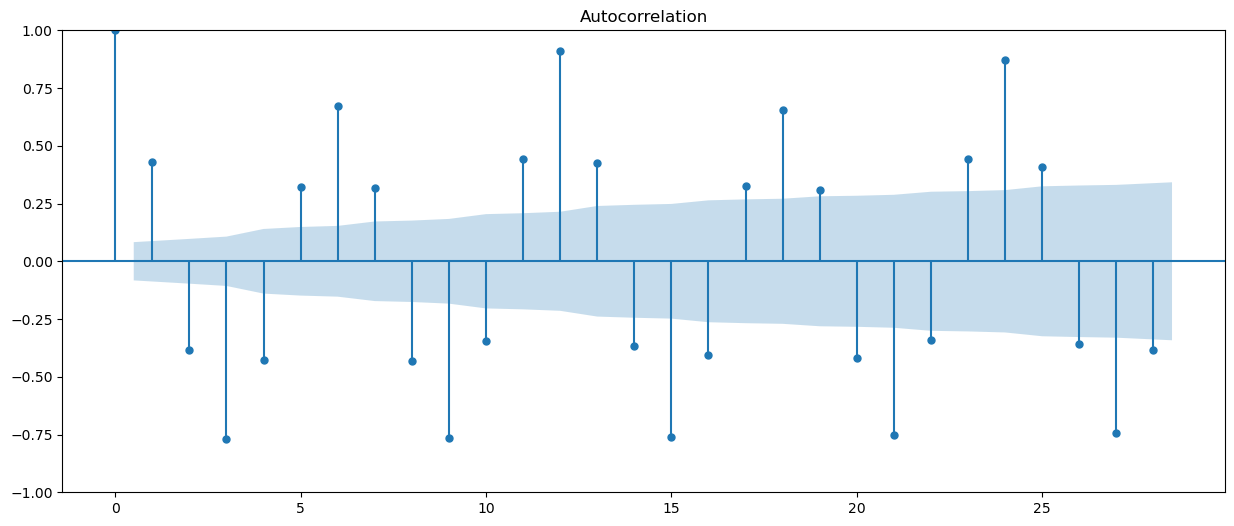

In [21]:
# For Autocorrelation 
fig, ax = plt.subplots(figsize=(15, 6))
acf = plot_acf(data_EC['Electricty_Consumption_in_TW_First_Difference'].dropna(), ax=ax)
plt.show()

C:\Users\Divya\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


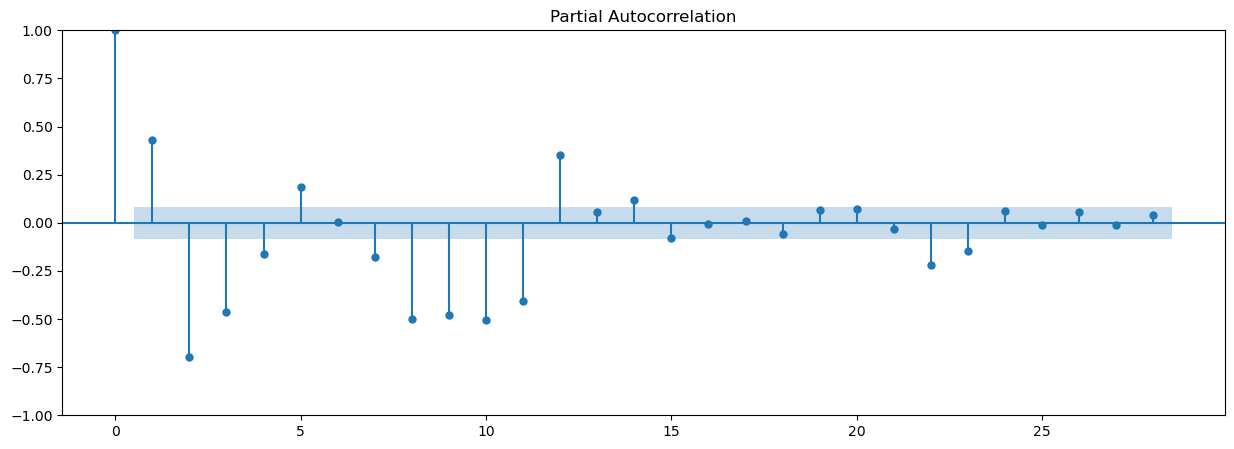

In [22]:
# For Partial Autocorrelation 
fig, ax = plt.subplots(figsize=(15, 5))
result = plot_pacf(data_EC['Electricty_Consumption_in_TW_First_Difference'].dropna(), ax=ax)

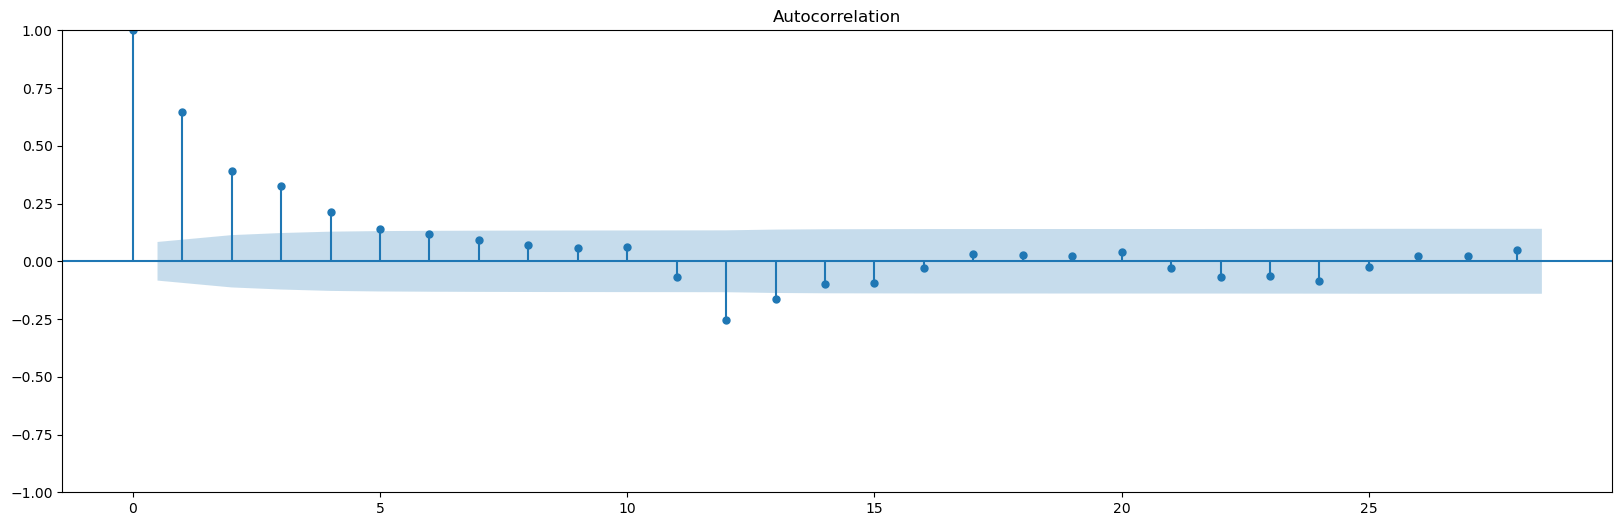

In [23]:
# For Autocorrelation 
fig, ax = plt.subplots(figsize=(20, 6))
acf12 = plot_acf(data_EC['Seasonal First Difference'].dropna(),ax=ax)

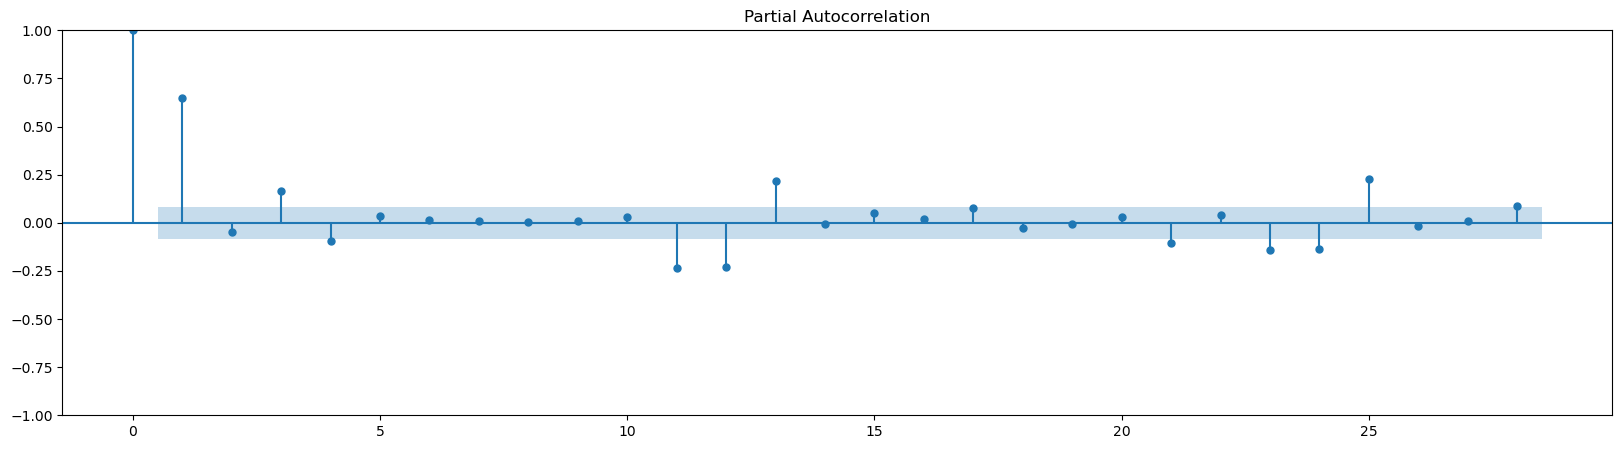

In [24]:
# For Partial Autocorrelation 
fig, ax = plt.subplots(figsize=(20, 5))
pacf12 = plot_pacf(data_EC['Seasonal First Difference'].dropna(),ax=ax)

In [25]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(data_EC['Electricty_Consumption_in_TW'],
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 1, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()

C:\Users\Divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  561
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1081.069
Date:                            Tue, 09 Jul 2024   AIC                           2172.139
Time:                                    17:37:22   BIC                           2193.541
Sample:                                01-01-1973   HQIC                          2180.513
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6072      0.039     15.769      0.000       0.532       0.683
ma.L1         -0.9395      0.019   

### MAE, RMSE

In [27]:
y_pred = model.fittedvalues['2019-01-01':]

y_actual =  data_EC['Electricty_Consumption_in_TW']['2019-01-01':]

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_actual,y_pred)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_actual, y_pred, squared=False)

#(R-squared)-- Coefficient of Determination 
r2 = r2_score(y_actual,y_pred)



In [30]:
# Display the error metrics
print("               Mean Absolute Error (MAE):", mae)
print("          Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)

               Mean Absolute Error (MAE): 2.1291684948956564
          Root Mean Squared Error (RMSE): 2.776563157369899
Coefficient of Determination (R-squared): 0.9399988414682462


In [31]:
data_final = pd.concat([y_actual,y_pred],axis=1)
data_final.head()

,Electricty_Consumption_in_TW,0
DATE,,
2019-01-01,111.8520,106.457454
2019-02-01,97.3261,101.978925
2019-03-01,93.8406,93.704847
2019-04-01,89.1873,87.774622
2019-05-01,97.5860,94.324519


In [32]:
data_final.columns = ['Actual_Values','Predicted_Values']
data_final.head()

,Actual_Values,Predicted_Values
DATE,,
2019-01-01,111.8520,106.457454
2019-02-01,97.3261,101.978925
2019-03-01,93.8406,93.704847
2019-04-01,89.1873,87.774622
2019-05-01,97.5860,94.324519


<Axes: xlabel='DATE'>

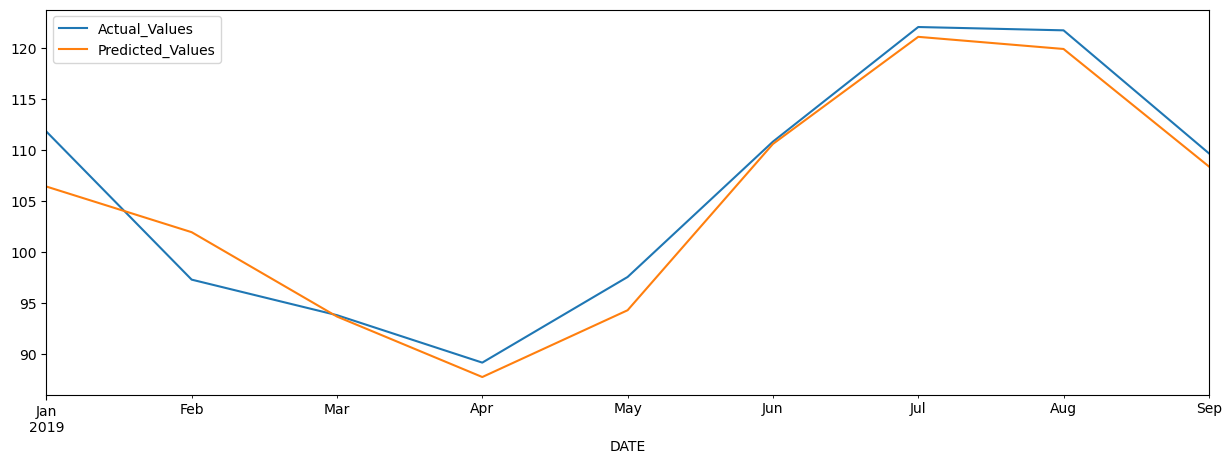

In [33]:
data_final.plot(figsize=(15,5))

### Forcasting

In [34]:
data_new = data_EC.copy()
data_new['forecast'] = model.predict(start = 500, end = 559, dynamic=True)
data_new.head()

,Electricty_Consumption_in_TW,Electricty_Consumption_in_TW_First_Difference,Seasonal First Difference,forecast
DATE,,,,
1973-01-01,35.9728,NaN,NaN,NaN
1973-02-01,36.1334,0.1606,NaN,NaN
1973-03-01,35.0625,-1.0709,NaN,NaN
1973-04-01,33.8416,-1.2209,NaN,NaN
1973-05-01,33.5107,-0.3309,NaN,NaN


<Axes: xlabel='DATE'>

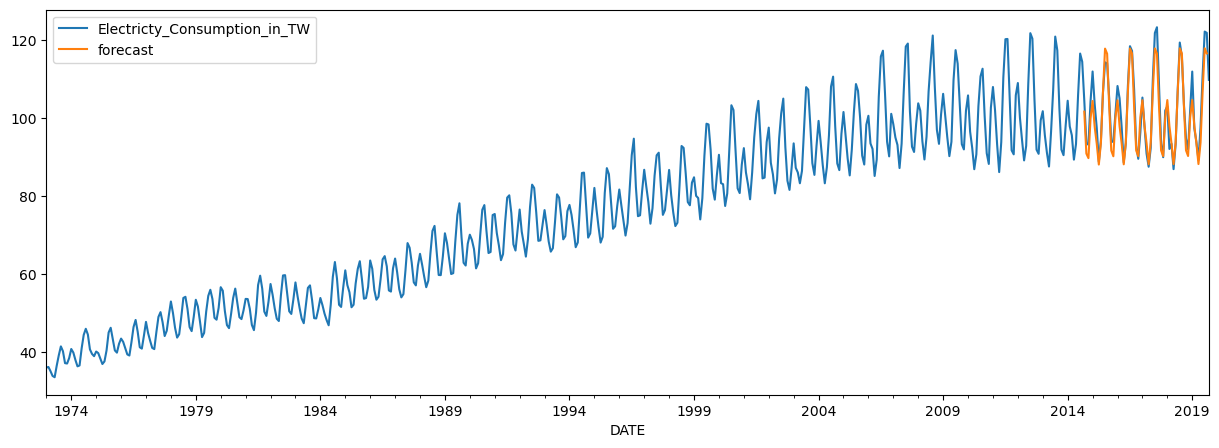

In [35]:
data_new[['Electricty_Consumption_in_TW','forecast']].plot(figsize=(15,5))

### Next 2 years forcasting

In [36]:
from pandas.tseries.offsets import DateOffset

In [37]:
data_sample.head()

,Electricty_Consumption_in_TW
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


In [38]:
new_dates = [data_sample.index[-1]+ DateOffset(months=x)for x in range(0,24)]

forecasting_for_next_24months = pd.DataFrame(index = new_dates[1:],columns = data_sample.columns)
forecast_df = pd.concat([data_sample,forecasting_for_next_24months])
forecast_df.shape


(584, 1)

<Axes: >

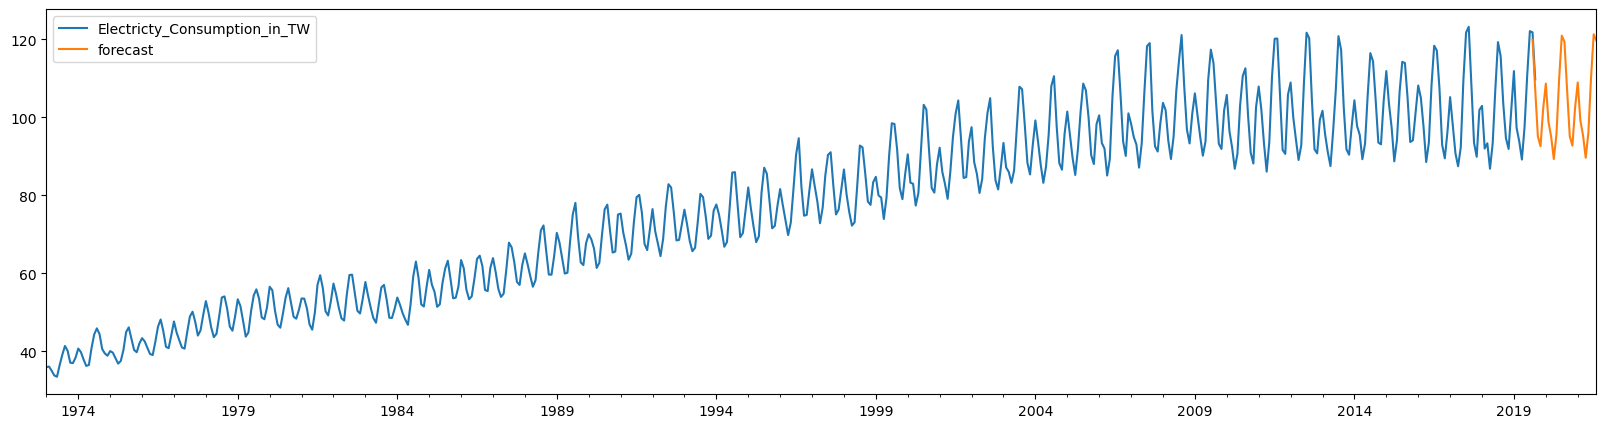

In [39]:
forecast_df['forecast'] = model.predict(start = 559, end = 584, dynamic=True)

forecast_df[['Electricty_Consumption_in_TW','forecast']].plot(figsize=(20,5))

In [40]:
# Data for last 24 months are to be forcasted
forecast_df.tail(24)

,Electricty_Consumption_in_TW,forecast
2019-09-01,109.719,107.208238
2019-10-01,NaN,95.146545
2019-11-01,NaN,92.612748
2019-12-01,NaN,102.222362
2020-01-01,NaN,108.661017
2020-02-01,NaN,98.820269
2020-03-01,NaN,95.043202
2020-04-01,NaN,89.318517
2020-05-01,NaN,95.720557
2020-06-01,NaN,109.756190


###               *************************** END *************************